In [31]:
# Import the modules
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
# Load the dataset which has different species in our National Park
# - The scientific name of each species
# - The common names of each species
# - The species conservation status

In [3]:
species = pd.read_csv('species_info.csv')

In [4]:
# Inspect each DataFrame 
print(species.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


In [5]:
# Check how many different species are in the 'species' DataFrame
species_count = species.scientific_name.nunique()
print(species_count)

5541


In [7]:
# Check what are the different values of 'category' in species
species_type = species.category.unique()
print(species_type)

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [9]:
# Check what are the different values of 'conservation_stauts'
conservation_statues = species.conservation_status.unique()
print(conservation_statues)

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [12]:
# Count up how many species meet each conservation_status
conservation_counts = species.groupby('conservation_status').scientific_name.nunique().reset_index()
print(conservation_counts)

  conservation_status  scientific_name
0          Endangered               15
1         In Recovery                4
2  Species of Concern              151
3          Threatened               10


In [13]:
# Change 'NaN' as another value
species.fillna('No Intervention', inplace = True)

In [14]:
# Group by Again
conservation_counts_fixed = species.groupby('conservation_status').scientific_name.nunique().reset_index()
print(conservation_counts_fixed)

  conservation_status  scientific_name
0          Endangered               15
1         In Recovery                4
2     No Intervention             5363
3  Species of Concern              151
4          Threatened               10


In [18]:
# Sort the DataFrame
protection_counts = species.groupby('conservation_status').scientific_name.nunique().reset_index().sort_values(by='scientific_name')
print(protection_counts)

  conservation_status  scientific_name
1         In Recovery                4
4          Threatened               10
0          Endangered               15
3  Species of Concern              151
2     No Intervention             5363


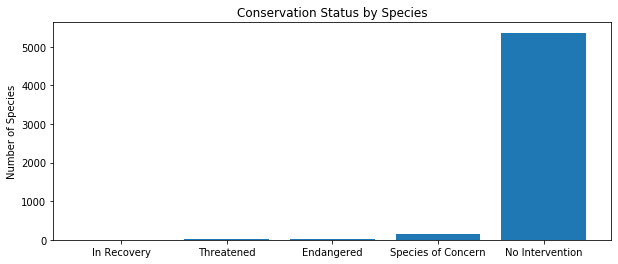

In [23]:
# Create Bar Chart
plt.figure(figsize=(10,4))
ax = plt.subplot()
plt.bar(range(len(protection_counts)),protection_counts.scientific_name)
ax.set_xticks(range(len(protection_counts)))
ax.set_xticklabels(protection_counts.conservation_status)
plt.ylabel('Number of Species')
plt.title('Conservation Status by Species')
plt.show()

In [25]:
# Create New Column in species called 'is_protected', which is True if conservation_status is not equal to 'No Intervention', and 'False' otherwise
species['is_protected'] = species.conservation_status != 'No Intervention'
print(species.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  \
0                           Gapper's Red-Backed Vole     No Intervention   
1                              American Bison, Bison     No Intervention   
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...     No Intervention   
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
4                                      Wapiti Or Elk     No Intervention   

   is_protected  
0         False  
1         False  
2         False  
3         False  
4         False  


In [26]:
#Group the species data frame by the category and is_protected columns and count the unique scientific_names in each grouping
category_counts = species.groupby(['category','is_protected']).scientific_name.nunique().reset_index()
print(category_counts)

             category  is_protected  scientific_name
0           Amphibian         False               72
1           Amphibian          True                7
2                Bird         False              413
3                Bird          True               75
4                Fish         False              115
5                Fish          True               11
6              Mammal         False              146
7              Mammal          True               30
8   Nonvascular Plant         False              328
9   Nonvascular Plant          True                5
10            Reptile         False               73
11            Reptile          True                5
12     Vascular Plant         False             4216
13     Vascular Plant          True               46


In [27]:
# Re-design as Pivot table
category_pivot = category_counts.pivot(columns='is_protected', index = 'category', values = 'scientific_name').reset_index()
print(category_pivot)

is_protected           category  False  True
0                     Amphibian     72     7
1                          Bird    413    75
2                          Fish    115    11
3                        Mammal    146    30
4             Nonvascular Plant    328     5
5                       Reptile     73     5
6                Vascular Plant   4216    46


In [28]:
# Rename the some columns
category_pivot.columns = ['category','not_protected','protected']
print(category_pivot)

            category  not_protected  protected
0          Amphibian             72          7
1               Bird            413         75
2               Fish            115         11
3             Mammal            146         30
4  Nonvascular Plant            328          5
5            Reptile             73          5
6     Vascular Plant           4216         46


In [29]:
# Calculate the Rate of protection
category_pivot['percent_protected'] = category_pivot.protected / (category_pivot.protected + category_pivot.not_protected)
print(category_pivot)

            category  not_protected  protected  percent_protected
0          Amphibian             72          7           0.088608
1               Bird            413         75           0.153689
2               Fish            115         11           0.087302
3             Mammal            146         30           0.170455
4  Nonvascular Plant            328          5           0.015015
5            Reptile             73          5           0.064103
6     Vascular Plant           4216         46           0.010793


In [38]:
# Use the Chi-Squared Test for significance
# Based on the percent_protected, the Mammal are more like to be endangered than birds
# Make contingency
contingency = [[30,146],
               [75,413]]
_, pval, _, _ = chi2_contingency(contingency)
print(pval)
# pval is higher than 0.05 which means does not significant
# We can conclude taht the difference between the percentages of protected birds and mammal is not significant and a result of chance.


0.6875948096661336


In [39]:
# Check the another significant (Reptile VS Mammal)
contigency2 = [[5,73],
               [30, 146]]
_, pval_reptile_mammal, _, _ = chi2_contingency(contigency2)
print(pval_reptile_mammal)
# P-value is less than 0.05 which means that does significant.

0.03835559022969898


In [47]:
# Load another data, which is recoding sightings of different species at several national parks for the past 7 days
observations = pd.read_csv('observations.csv')
print(observation.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [48]:
# Make new column which has 'sheep or not' in the species DF
species['is_sheep'] = species.common_names.apply(lambda x: 'Sheep' in x)
species_is_sheep = species[species.is_sheep]
print(species_is_sheep)


            category              scientific_name  \
3             Mammal                   Ovis aries   
1139  Vascular Plant             Rumex acetosella   
2233  Vascular Plant           Festuca filiformis   
3014          Mammal              Ovis canadensis   
3758  Vascular Plant             Rumex acetosella   
3761  Vascular Plant            Rumex paucifolius   
4091  Vascular Plant                 Carex illota   
4383  Vascular Plant  Potentilla ovina var. ovina   
4446          Mammal      Ovis canadensis sierrae   

                                           common_names conservation_status  \
3     Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
1139                        Sheep Sorrel, Sheep Sorrell     No Intervention   
2233                              Fineleaf Sheep Fescue     No Intervention   
3014                       Bighorn Sheep, Bighorn Sheep  Species of Concern   
3758  Common Sheep Sorrel, Field Sorrel, Red Sorrel,...     No Interventio

In [49]:
# Select the rows of species where is_sheep is True & category is Mammal
sheep_species = species[(species.is_sheep) & (species.category == 'Mammal')]
print(sheep_species)

     category          scientific_name  \
3      Mammal               Ovis aries   
3014   Mammal          Ovis canadensis   
4446   Mammal  Ovis canadensis sierrae   

                                           common_names conservation_status  \
3     Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
3014                       Bighorn Sheep, Bighorn Sheep  Species of Concern   
4446                        Sierra Nevada Bighorn Sheep          Endangered   

      is_protected  is_sheep  
3            False      True  
3014          True      True  
4446          True      True  


In [52]:
# Merge 2 DataFrame (sheep & observation)
sheep_observations = pd.merge(sheep_species,observations)
print(sheep_observations)

   category          scientific_name  \
0    Mammal               Ovis aries   
1    Mammal               Ovis aries   
2    Mammal               Ovis aries   
3    Mammal               Ovis aries   
4    Mammal          Ovis canadensis   
5    Mammal          Ovis canadensis   
6    Mammal          Ovis canadensis   
7    Mammal          Ovis canadensis   
8    Mammal  Ovis canadensis sierrae   
9    Mammal  Ovis canadensis sierrae   
10   Mammal  Ovis canadensis sierrae   
11   Mammal  Ovis canadensis sierrae   

                                         common_names conservation_status  \
0   Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
1   Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
2   Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
3   Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
4                        Bighorn Sheep, Bighorn Sheep  Species of Concern   
5                

In [54]:
# Group by the park
obs_by_park = sheep_observations.groupby('park_name').observations.sum().reset_index()
print(obs_by_park)

                             park_name  observations
0                  Bryce National Park           250
1  Great Smoky Mountains National Park           149
2            Yellowstone National Park           507
3               Yosemite National Park           282


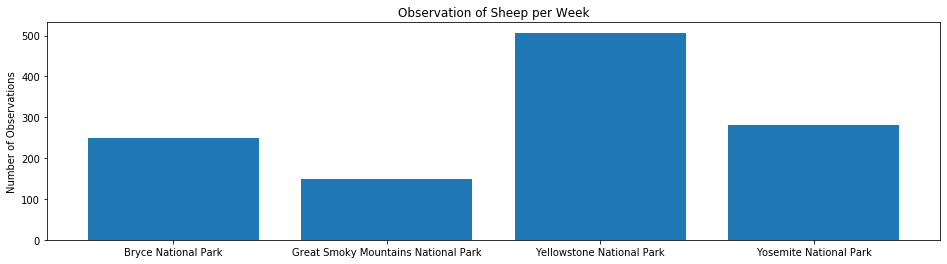

In [59]:
# Create Bar chart
plt.figure(figsize =(16,4))
ax= plt.subplot()
plt.bar(range(len(obs_by_park)),obs_by_park.observations.values)
ax.set_xticks(range(len(obs_by_park)))
ax.set_xticklabels(obs_by_park.park_name.values)
plt.ylabel('Number of Observations')
plt.title('Observation of Sheep per Week')
plt.show()

In [65]:
# Let's say that 15% of sheep at Bryce national Park have foot and mouth disease. 
# Park rangers at Yellowstone National Park have been running a program to reduce the rate of foot and mouth disease 
# at that park. The scientists want to test whether or not this program is working. 
# They want to be able to detect reductions of at least 5 percentage points. For instance, 
# if 10% of sheep in Yellowstone have foot and mouth disease, they'd like to be able to know this, with confidence.
# Let's use sample size calulator to caculate the number of sheep that they would need to observe from each park.
# Use the default level of significance(90%)

baseline = 15
minimum_detectable_effect = 100 * 5. / 15
Statistical_significance  = 90
sample_size_per_variant = 870

In [66]:
# How many weeks would you need to observe sheep at Bryce National Park in order to observe enough sheep
bryce_weeks_observing = sample_size_per_variant/250.
print(bryce_weeks_observing)

3.48


In [ ]:
# Conclusion
# Given a baseline of 15% occurrence of foot and mouth disease in sheep at Bryce National Park, 
# you found that if the scientists wanted to be sure that a >5% drop in observed cases of foot and mouth disease 
# in the sheep at Yellowstone was significant they would have to observe at least 870 sheep.

# Then, using the observation data you analyzed earlier, you found that this would take approximately 
# one week of observing in Yellowstone to see that many sheep, or approximately two weeks in Bryce to see that many sheep.

